In [1]:
import numpy as np
import pandas as pd   
import random 
import plotly.graph_objects as go
import plotly.express as px
import plotly
import os       

In [2]:
df_19 = pd.read_csv("players_19.csv", error_bad_lines=False)
df_20 = pd.read_csv("players_20.csv", error_bad_lines=False)
df_21 = pd.read_csv("players_21.csv", error_bad_lines=False)
df_league = pd.read_csv("teams_and_leagues.csv", error_bad_lines=False)

In [4]:
attributes = ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram',
       'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb',
       'lcb', 'cb', 'rcb', 'rb']

for attribute in attributes:
    split_values = df_20[attribute].str.split("+", n=1, expand=True)
    df_20[attribute] = split_values[0]
df_20[attributes] = df_20[attributes].fillna(0)
df_20[attributes] = df_20[attributes].astype(int)
df_20[attributes].head(6)


,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,89,89,89,93,93,93,93,93,93,93,...,68,66,66,66,68,63,52,52,52,63
1,91,91,91,89,90,90,90,89,88,88,...,65,61,61,61,65,61,53,53,53,61
2,84,84,84,90,89,89,89,90,90,90,...,66,61,61,61,66,61,46,46,46,61
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,83,83,83,89,88,88,88,89,89,89,...,66,63,63,63,66,61,49,49,49,61
5,82,82,82,87,87,87,87,87,88,88,...,77,77,77,77,77,73,66,66,66,73


In [5]:
df_20 = pd.concat([df_20, pd.get_dummies(df_20['work_rate'])], axis=1)
df_20 = df_20.drop(['work_rate'], axis=1)
df_20.shape

(18278, 104)

In [6]:
# Split the dob column to fetch month
new = df_20["dob"].str.split("-", n = 2, expand = True)
df_20["birth_month"] = new[1].astype(int)
df_20["birth_month"].head(6)

0    6
1    2
2    2
3    1
4    1
5    6
Name: birth_month, dtype: int64

In [7]:
df_20 = pd.concat([df_20, df_20['player_positions'].str.get_dummies(sep=', ').add_prefix('Position_')], axis=1)
df_20 = df_20.drop(['player_positions'], axis=1)
df_20.shape


(18278, 119)

Creation of a BMI feature using Weight_kg & Height_cm and use it instead of 'body_type' feature.

In [8]:
df_updated['body_index'] = df_updated['mass_kg'] / (df_updated['size_cm'] / 100) ** 2
df_current['body_index'] = df_current['mass_kg'] / (df_current['size_cm'] / 100) ** 2
df_old['body_index'] = df_old['mass_kg'] / (df_old['size_cm'] / 100) ** 2
df_current['body_index'].head(6)


0    24.913495
1    23.735308
2    22.204082
3    24.615211
4    24.163265
5    21.366869
Name: bmi, dtype: float64

In [9]:
data_missing = df_20.isnull().sum().sort_values(ascending=False)
data_missing = data_missing.reset_index(drop=False)
data_missing = data_missing.rename(columns={"index": "Fields", 0:


In [11]:
attributes_to_fill = ["dribbling", "defending", "physic", "passing", "shooting", "pace"]
for attribute in attributes_to_fill:
    df_20[attribute] = df_20[attribute].fillna(df_20[attribute].median())

df_20 = df_20.fillna(0)
df_20.isnull().sum()

short_name      0
age             0
dob             0
height_cm       0
weight_kg       0
               ..
Position_RM     0
Position_RW     0
Position_RWB    0
Position_ST     0
bmi             0
Length: 120, dtype: int64

In [26]:
sample_a = a['attacking_finishing'].sample(n=30)
sample_b = b['attacking_finishing'].sample(n=30)

# Cross Checking with the internal scipy function
t_statistic, p_value = stats.ttest_ind(sample_a, sample_b, equal_var=False)
print("t = " + str(t_statistic))
print("p = " + str(p_value))

t = 0.7824274220514761
p = 0.437146298508187


# Recommend Alternate Playing Position per Player

In [31]:
import re

def discover_alternate_positions(player_name, player_df):
    player_idx = player_df[player_df['full_name'] == player_name].index[0]
    attribute_sample = player_df.iloc[:, 68:94]
    top_positions = attribute_sample.loc[player_idx].nlargest(5).index[0:].values.tolist()
    
    attribute_sample_2 = player_df.iloc[player_idx, 104:119]
    selected_positions = attribute_sample_2[attribute_sample_2 == 1].index[:].values.tolist()
    selected_positions = list(map(lambda x: x.lower(), selected_positions))
    selected_positions = [re.sub(r'position_', '', i) for i in selected_positions]
    
    alternate_positions = set(top_positions) - set(selected_positions)
    
    print("Additional Playing Roles for {} are:".format(player_name))
    for position in alternate_positions:
        print("Position: {}, Rating: {}".format(str.upper(position), player_df[position].values[player_idx]))
    
    return None


# P. Pogba

In [32]:
alternate_position("P. Pogba", df_20)

Alternate Playing Positions for P. Pogba are
Position: LAM, Rating: 84
Position: LCM, Rating: 84
Position: CAM, Rating: 84
Position: RAM, Rating: 84


# M. Salah

In [33]:
alternate_position('M. Salah', df_20)

Alternate Playing Positions for M. Salah are
Position: RF, Rating: 88
Position: LF, Rating: 88
Position: CF, Rating: 88
Position: LW, Rating: 88


# Player Recommendation

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

### 1: Fetch numeric columns

In [35]:
sample = df_21.select_dtypes(include='number')
print(sample.head())

   age  height_cm  weight_kg  overall  potential  value_eur  wage_eur  \
0   32        170         72       94         94   95500000    565000   
1   34        187         83       93         93   58500000    405000   
2   27        175         68       92         92  105500000    290000   
3   26        188         87       91         93   77500000    125000   
4   28        175         74       91         91   90000000    470000   

   international_reputation  weak_foot  skill_moves  ...  Position_LB  \
0                         5          4            4  ...            0   
1                         5          4            5  ...            0   
2                         5          5            5  ...            0   
3                         3          3            1  ...            0   
4                         4          4            4  ...            0   

   Position_LM  Position_LW  Position_LWB  Position_RB  Position_RM  \
0            0            0             0          

### 2: Correlation Matrix

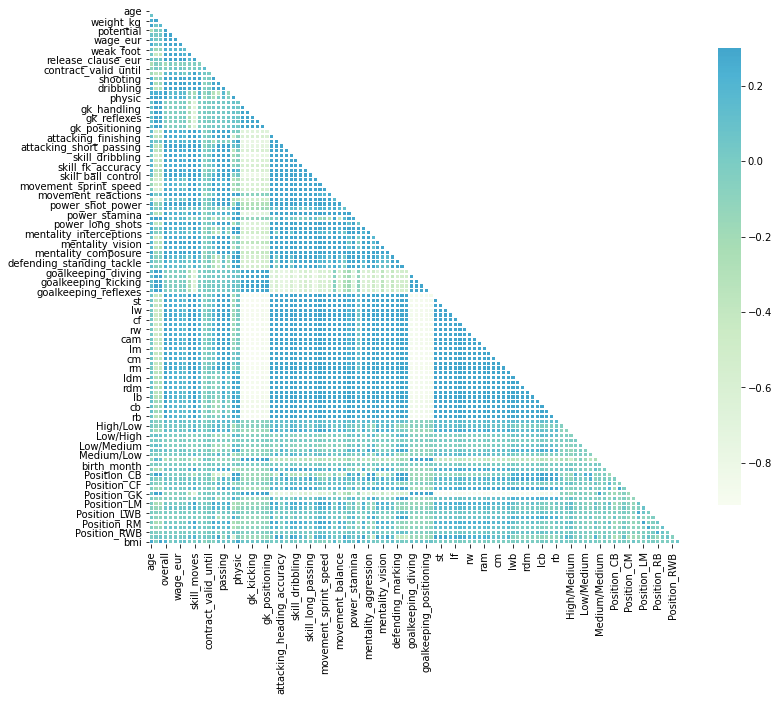

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 12))

correlation_matrix = sample.corr()

mask = np.zeros_like(correlation_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(correlation_matrix, mask=mask, cmap="GnBu", vmax=.3, center=0,
            square=True, linewidths=.7, cbar_kws={"shrink": .7})


# Standardize, implement NearestNeighbors generate 5 similar players

In [37]:
scaled = StandardScaler()
X = scaled.fit_transform(sample)
recommendations = NearestNeighbors(n_neighbors=6,algorithm='kd_tree')
recommendations.fit(X)
player_index = recommendations.kneighbors(X)[1]


In [38]:
def find_player_index(player_name):
    return df_20[df_20['name'] == player_name].index.tolist()[0]

5 indexes of similar players
def recommend_similar_players(player_name):
    print("Here are 5 players similar to {} : ".format(player_name))
    player_index = find_player_index(player_name)
    for similar_index in similar_players_index[player_index][1:]:
        print("Name: {}\nOverall: {}\nMarket Value: €{}\nAge: {}\nBMI: {:.2f}\n".format(df_20.iloc[similar_index]['name'], df_20.iloc[similar_index]['overall'], df_20.iloc[similar_index]['value_eur'], df_20.iloc[similar_index]['age'], df_20.iloc[similar_index]['bmi']))


1. Collaborative Filtering Algorithms
2. Matrix Factorization Algorithms
3. Content-Based Filtering
4. Deep Learning Models
5. Hybrid Models
6. Graph-Based Approaches

In [ ]:
### Test 1: Eden Hazard

In [39]:
recommend_similar('E. Hazard')

These are 5 players similar to E. Hazard : 
Name: A. Griezmann
Overall: 89
Market Value: €69000000
Age: 28
BMI: 23.57

Name: L. Messi
Overall: 94
Market Value: €95500000
Age: 32
BMI: 24.91

Name: Neymar Jr
Overall: 92
Market Value: €105500000
Age: 27
BMI: 22.20

Name: K. De Bruyne
Overall: 91
Market Value: €90000000
Age: 28
BMI: 21.37

Name: R. Sterling
Overall: 88
Market Value: €73000000
Age: 24
BMI: 23.88



### Test 2: J. Gomez

In [40]:
recommend_similar('J. Gomez')

These are 5 players similar to J. Gomez : 
Name: M. Holgate
Overall: 75
Market Value: €8000000
Age: 22
BMI: 22.15

Name: N. Mukiele
Overall: 77
Market Value: €12000000
Age: 21
BMI: 21.62

Name: B. Pavard
Overall: 79
Market Value: €15500000
Age: 23
BMI: 21.97

Name: A. Tuanzebe
Overall: 73
Market Value: €6500000
Age: 21
BMI: 21.04

Name: N. Elvedi
Overall: 78
Market Value: €13000000
Age: 22
BMI: 21.84



### Test 3: Alisson

In [41]:
recommend_similar('Alisson')

These are 5 players similar to Alisson : 
Name: Ederson
Overall: 88
Market Value: €54500000
Age: 25
BMI: 24.33

Name: De Gea
Overall: 89
Market Value: €56000000
Age: 28
BMI: 22.24

Name: T. Courtois
Overall: 88
Market Value: €48000000
Age: 27
BMI: 24.24

Name: M. ter Stegen
Overall: 90
Market Value: €67500000
Age: 27
BMI: 24.31

Name: W. Szczęsny
Overall: 86
Market Value: €37500000
Age: 29
BMI: 23.67



# Club Similarity Rating

In [42]:
sorted_data = df_20.sort_values(by=['overall'], ascending=False)
new_data_sample = pd.DataFrame(columns=["overall", "pace", "shooting", "passing", "dribbling", "defending", "physic", "team"])

for team_name in sorted_data['team'].unique():
    overall_median = sorted_data[sorted_data['team'] == team_name][0:24]['overall'].median()
    pace_median = sorted_data[sorted_data['team'] == team_name][0:24]['pace'].median()
    shooting_median = sorted_data[sorted_data['team'] == team_name][0:24]['shooting'].median()
    passing_median = sorted_data[sorted_data['team'] == team_name][0:24]['passing'].median()
    dribbling_median = sorted_data[sorted_data['team'] == team_name][0:24]['dribbling'].median()
    defending_median = sorted_data[sorted_data['team'] == team_name][0:24]['defending'].median()
    physic_median = sorted_data[sorted_data['team'] == team_name][0:24]['physic'].median()
    
    team_data = [overall_median, pace_median, shooting_median, passing_median, dribbling_median, defending_median, physic_median, team_name]
    
    data_length = len(new_data_sample)
    new_data_sample.loc[data_length] = team_data


In [43]:
new_sample

,overall,pace,shooting,passing,dribbling,defending,physic,team
0,84.5,73.0,63.5,76.0,78.0,71.0,72.5,FC Barcelona
1,83.5,69.5,68.0,76.5,78.5,72.5,74.0,Juventus
2,82.0,75.0,64.0,72.5,77.5,70.5,72.0,Paris Saint-Germain
3,81.5,73.0,66.5,72.5,75.0,73.0,73.0,Atlético Madrid
4,85.0,78.0,72.5,75.0,81.0,62.5,71.5,Real Madrid
...,...,...,...,...,...,...,...,...
693,58.0,67.0,49.0,53.0,56.0,52.0,61.0,Sligo Rovers
694,56.0,66.0,48.0,51.5,56.0,51.5,60.5,Finn Harps
695,60.0,69.0,35.0,45.0,58.0,57.0,62.0,Seongnam FC
696,54.0,62.0,38.0,46.0,54.0,49.0,56.0,UCD AFC


In [44]:
scaled = StandardScaler()
X = scaled.fit_transform(new_sample.iloc[:,0:7])
recommendations = NearestNeighbors(n_neighbors=4,algorithm='kd_tree')
recommendations.fit(X)
club_index = recommendations.kneighbors(X)[1]

In [45]:
def get_index(x):
    return new_sample[new_sample['team']==x].index.tolist()[0]
def recommend_similar(club):
    print("These are 3 clubs similar to {} : ".format(club))
    index=  get_index(club)
    for i in club_index[index][1:]:
        print("Name: {}\nOverall: {}\nPace: {}\nShooting: {}\nPassing: {}\nDribbling: {}\nDefending: {}\n".format(new_sample.iloc[i]['team'],new_sample.iloc[i]['overall'],new_sample.iloc[i]['pace'],new_sample.iloc[i]['shooting'],new_sample.iloc[i]['passing'],new_sample.iloc[i]['dribbling'],new_sample.iloc[i]['defending']))

### Test 1: FC Barcelona

In [46]:
recommend_similar('FC Barcelona')

These are 3 clubs similar to FC Barcelona : 
Name: Tottenham Hotspur
Overall: 80.5
Pace: 73.5
Shooting: 64.0
Passing: 74.0
Dribbling: 77.0
Defending: 71.0

Name: Paris Saint-Germain
Overall: 82.0
Pace: 75.0
Shooting: 64.0
Passing: 72.5
Dribbling: 77.5
Defending: 70.5

Name: Atlético Madrid
Overall: 81.5
Pace: 73.0
Shooting: 66.5
Passing: 72.5
Dribbling: 75.0
Defending: 73.0



### Test 2: FC Bayern München

In [47]:
recommend_similar('FC Bayern München')

These are 3 clubs similar to FC Bayern München : 
Name: Liverpool
Overall: 82.0
Pace: 74.0
Shooting: 65.5
Passing: 76.5
Dribbling: 77.0
Defending: 65.5

Name: Manchester City
Overall: 84.0
Pace: 72.5
Shooting: 66.5
Passing: 77.0
Dribbling: 79.0
Defending: 60.0

Name: Chelsea
Overall: 80.0
Pace: 70.5
Shooting: 67.0
Passing: 71.5
Dribbling: 76.5
Defending: 64.5

